In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#load the data
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
# split the data
from sklearn.model_selection import train_test_split
X,Y=data.data,data.target
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)

In [29]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0. 148.]
 [  1. 233.]]


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
#build model
N,D=X_train.shape
model=nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [17]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters())

In [18]:
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test=torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [21]:
n_epochs=1000

train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)


for it in range(n_epochs):
  optimizer.zero_grad()

  train_output=model(X_train)
  train_loss=criterion(train_output,y_train)



  train_loss.backward()
  optimizer.step()


  test_output=model(X_test)
  test_loss=criterion(test_output,y_test)



  test_loss.backward()
  optimizer.step()
  test_losses[it]=(test_loss.item())
  train_losses[it]= (train_loss.item())
  print(f'Epoch{it+1}/{n_epochs},train loss:{train_loss.item()},test_loss:{test_loss.item()}')






Epoch1/1000,train loss:0.6444094181060791,test_loss:0.6723188161849976
Epoch2/1000,train loss:0.6322451829910278,test_loss:0.6619300246238708
Epoch3/1000,train loss:0.6206899285316467,test_loss:0.6517581343650818
Epoch4/1000,train loss:0.6094292998313904,test_loss:0.641802966594696
Epoch5/1000,train loss:0.5984643697738647,test_loss:0.6320654153823853
Epoch6/1000,train loss:0.587796151638031,test_loss:0.6225456595420837
Epoch7/1000,train loss:0.5774232149124146,test_loss:0.6132439374923706
Epoch8/1000,train loss:0.5673429369926453,test_loss:0.6041604280471802
Epoch9/1000,train loss:0.5575516223907471,test_loss:0.595294713973999
Epoch10/1000,train loss:0.548044741153717,test_loss:0.5866459012031555
Epoch11/1000,train loss:0.5388174653053284,test_loss:0.5782120823860168
Epoch12/1000,train loss:0.5298640727996826,test_loss:0.5699908137321472
Epoch13/1000,train loss:0.5211784243583679,test_loss:0.5619788765907288
Epoch14/1000,train loss:0.5127540230751038,test_loss:0.5541725754737854
Epoch

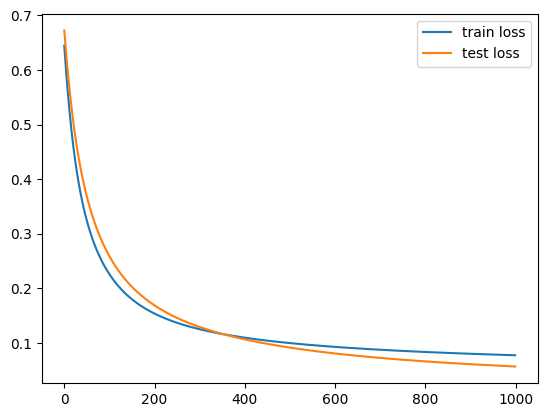

In [22]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.show()

In [24]:
with torch.no_grad():
  p_train=model(X_train)
  p_train=np.round(p_train.numpy())
  train_acc=np.mean(y_train.numpy()==p_train)

  p_test=model(X_test)
  p_test=np.round(p_test.numpy())
  test_acc=np.mean(y_test.numpy()==p_test)

print(f'train_acc:{train_acc}, test_acc:{test_acc}')

train_acc:0.9816272965879265, test_acc:0.9946808510638298
